In [510]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score

In [511]:
url1 = 'tourism/package_tourism.csv'
package = pd.read_csv(url1)
url2 = 'tourism/tourism_rating.csv'
rating = pd.read_csv(url2)
url3 = 'tourism/tourism_with_id.csv'
tourism= pd.read_csv(url3)
url4 = 'tourism/user.csv'
user = pd.read_csv(url4)

## Package DataFrame

In [512]:
package.head()

,Package,City,Place_Tourism1,Place_Tourism2,Place_Tourism3,Place_Tourism4,Place_Tourism5
0,1,Jakarta,Pasar Tanah Abang,Taman Ayodya,Museum Tekstil,NaN,NaN
1,2,Jakarta,Pasar Tanah Abang,Pasar Taman Puring,Pasar Petak Sembilan,NaN,NaN
2,3,Jakarta,Perpustakaan Nasional,Monas,Masjid Istiqlal,NaN,NaN
3,4,Jakarta,Pulau Tidung,Pulau Bidadari,Pulau Pari,Pulau Pramuka,Pulau Pelangi
4,5,Jakarta,Museum Satria Mandala,Museum Wayang,Museum Bahari Jakarta,Museum Macan (Modern and Contemporary Art in N...,NaN


In [513]:
package.shape

(100, 7)

## Rating DataFrame

In [514]:
rating.head()

,User_Id,Place_Id,Place_Ratings
0,1,179,3
1,1,344,2
2,1,5,5
3,1,373,3
4,1,101,4


In [515]:
user.head()

,User_Id,Location,Age
0,1,"Semarang, Jawa Tengah",20
1,2,"Bekasi, Jawa Barat",21
2,3,"Cirebon, Jawa Barat",23
3,4,"Bekasi, Jawa Barat",21
4,5,"Lampung, Sumatera Selatan",20


In [516]:
user_age = user[['User_Id','Age']]
a = rating.merge(user_age, on='User_Id')
a.head()

,User_Id,Place_Id,Place_Ratings,Age
0,1,179,3,20
1,1,344,2,20
2,1,5,5,20
3,1,373,3,20
4,1,101,4,20


In [517]:
#menghitung jumlah rating per user_id
age_mean = a['Age'].groupby([a['Place_Id']]).mean()
age_mean = round(age_mean)
age_mean

Place_Id
1      27.0
2      29.0
3      28.0
4      30.0
5      29.0
       ... 
433    28.0
434    30.0
435    27.0
436    28.0
437    28.0
Name: Age, Length: 437, dtype: float64

In [518]:
#menghitung jumlah lokasi yang dikunjungi per User_Id
count_place = rating['Place_Id'].groupby(rating['Place_Id']).count()
count_place

Place_Id
1      18
2      25
3      19
4      21
5      25
       ..
433    23
434    25
435    17
436    22
437    38
Name: Place_Id, Length: 437, dtype: int64

In [519]:
rating.shape

(10000, 3)

## User DataFrame

In [520]:
user.head()

,User_Id,Location,Age
0,1,"Semarang, Jawa Tengah",20
1,2,"Bekasi, Jawa Barat",21
2,3,"Cirebon, Jawa Barat",23
3,4,"Bekasi, Jawa Barat",21
4,5,"Lampung, Sumatera Selatan",20


In [521]:
user.shape

(300, 3)

In [522]:
user.isna().sum()

User_Id     0
Location    0
Age         0
dtype: int64

In [523]:
user.describe()

,User_Id,Age
count,300.000000,300.000000
mean,150.500000,28.700000
std,86.746758,6.393716
min,1.000000,18.000000
25%,75.750000,24.000000
50%,150.500000,29.000000
75%,225.250000,34.000000
max,300.000000,40.000000


## Tourism DataFrame

In [524]:
tourism.head()

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Unnamed: 11,Unnamed: 12
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153,NaN,1
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6,90.0,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,106.817125,NaN,2
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,270000,4.6,360.0,"{'lat': -6.125312399999999, 'lng': 106.8335377}",-6.125312,106.833538,NaN,3
3,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,10000,4.5,NaN,"{'lat': -6.302445899999999, 'lng': 106.8951559}",-6.302446,106.895156,NaN,4
4,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5,60.0,"{'lat': -6.12419, 'lng': 106.839134}",-6.124190,106.839134,NaN,5


In [525]:
#menmfilter dua kolom kosong dan kolom koordinat
tourism_id = tourism.iloc[:,:-5]

In [526]:
tourism_id.head()

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6,90.0
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,270000,4.6,360.0
3,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,10000,4.5,NaN
4,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5,60.0


In [527]:
#menambah rata-rata usia pengunjung per lokasi wisata
tourism_id['age_mean'] = tourism_id['Place_Id'].map(age_mean)
#menambah kolom jumlah pengunjung per lokasi wisata
tourism_id['visitor_count'] = tourism_id['Place_Id'].map(count_place)
tourism_id['pendapatan'] = tourism_id['Price'] * tourism_id['visitor_count']
tourism_id.head()

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,age_mean,visitor_count,pendapatan
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,27.0,18,360000
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6,90.0,29.0,25,0
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,270000,4.6,360.0,28.0,19,5130000
3,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,10000,4.5,NaN,30.0,21,210000
4,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5,60.0,29.0,25,2350000


In [528]:
#menghitung jumlah nama lokasi 
tourism_id['Place_Name'].nunique()

437

In [529]:
#melihat statistik deskripsi
tourism_id.describe()

,Place_Id,Price,Rating,Time_Minutes,age_mean,visitor_count,pendapatan
count,437.000000,437.000000,437.000000,205.000000,437.000000,437.000000,4.370000e+02
mean,219.000000,24652.173913,4.442792,82.609756,28.755149,22.883295,5.429176e+05
std,126.295289,66446.374709,0.208587,52.872339,1.377074,4.842247,1.379387e+06
min,1.000000,0.000000,3.400000,10.000000,25.000000,12.000000,0.000000e+00
25%,110.000000,0.000000,4.300000,45.000000,28.000000,20.000000,0.000000e+00
50%,219.000000,5000.000000,4.500000,60.000000,29.000000,22.000000,1.260000e+05
75%,328.000000,20000.000000,4.600000,120.000000,30.000000,26.000000,3.900000e+05
max,437.000000,900000.000000,5.000000,360.000000,33.000000,39.000000,1.620000e+07


### Visualisasi

In [530]:
#menghitung jumlah kuantitas rating
tourism_id['Rating'].groupby(tourism_id['Rating']).count()

Rating
3.4     1
3.8     2
3.9     3
4.0    18
4.1    20
4.2    20
4.3    47
4.4    98
4.5    98
4.6    75
4.7    37
4.8    10
4.9     4
5.0     4
Name: Rating, dtype: int64

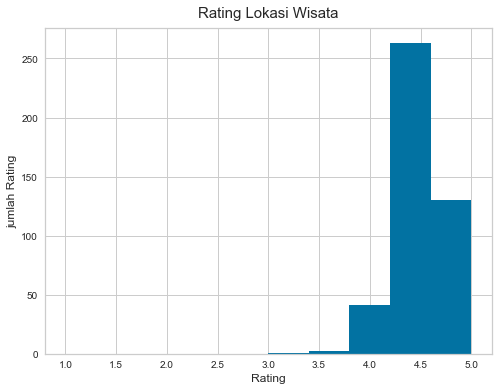

In [531]:
plt.figure()
plt.hist(tourism_id['Rating'], range=(1, 5))
plt.title('Rating Lokasi Wisata', fontsize=15, pad=10)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('jumlah Rating', fontsize=12)
plt.gcf().set_size_inches(8, 6)
plt.show()

In [532]:
x = tourism_id['Category'].groupby(tourism_id['City']).value_counts()
x = x.reset_index(name='count')

#mengubah nilai kota menjadi kolom
x = x.pivot_table(values='count', index='Category', columns='City', aggfunc='first')
#mengubah pivot table menjadi normal tabel
x = pd.DataFrame(x.to_records())
x.head()

,Category,Bandung,Jakarta,Semarang,Surabaya,Yogyakarta
0,Bahari,NaN,8.0,4.0,1.0,34.0
1,Budaya,22.0,32.0,15.0,18.0,30.0
2,Cagar Alam,54.0,4.0,20.0,5.0,23.0
3,Pusat Perbelanjaan,1.0,10.0,NaN,1.0,3.0
4,Taman Hiburan,39.0,27.0,15.0,18.0,36.0


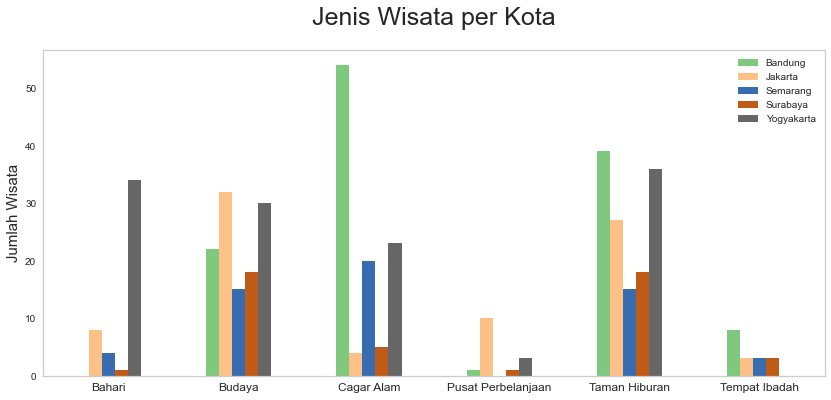

In [533]:
x[['Category','Bandung','Jakarta','Semarang','Surabaya','Yogyakarta']].plot(x='Category', 
                                                                            kind='bar', 
                                                                            linewidth=0, 
                                                                            alpha=1, 
                                                                            cmap='Accent',
                                                                            align='center', 
                                                                            width=0.5)
plt.title('Jenis Wisata per Kota', fontsize=25, pad=25)
plt.xlabel('')
plt.xticks(rotation=0, fontsize=12)
plt.ylabel('Jumlah Wisata', fontsize=15)
plt.grid(which='major', axis='both', linestyle='--', alpha=0.4) # axis untuk menentukan arah grid vertikal atau horizonta
plt.gcf().set_size_inches(14, 6)
plt.savefig('Jenis Wisata per Kota.jpg', dpi=288)
plt.show()

# Preprocessing data

In [534]:
#melihat data unik untuk kolom kategori dan kota
print(tourism_id['Category'].unique())
print(tourism_id['City'].unique())

['Budaya' 'Taman Hiburan' 'Cagar Alam' 'Bahari' 'Pusat Perbelanjaan'
 'Tempat Ibadah']
['Jakarta' 'Yogyakarta' 'Bandung' 'Semarang' 'Surabaya']


In [535]:
#melihat nilai null di tiap kolom
tourism_id.isnull().sum()

Place_Id           0
Place_Name         0
Description        0
Category           0
City               0
Price              0
Rating             0
Time_Minutes     232
age_mean           0
visitor_count      0
pendapatan         0
dtype: int64

In [536]:
#mengubah data kosong menjadi nol (0)
#data nol (0) berarti kunjungan tidak dibatas waktu 
tourism_id['Time_Minutes'] = tourism_id['Time_Minutes'].fillna(0)

In [537]:
#melihat nilai null di tiap kolom
tourism_id.isnull().sum()

Place_Id         0
Place_Name       0
Description      0
Category         0
City             0
Price            0
Rating           0
Time_Minutes     0
age_mean         0
visitor_count    0
pendapatan       0
dtype: int64

### Standarisasi Kolom Kategorik

In [538]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
# Membuat data frame berisi kolom kategorik
kategorik = tourism_id[['Category','City']].copy()
  
# Melakukan labelEncoder per kolom kategorikal  
for col in kategorik.columns:  
    kategorik[col]= le.fit_transform(kategorik[col])

kategorik.head()

,Category,City
0,1,1
1,1,1
2,4,1
3,4,1
4,4,1


### Standarisasi Kolom Numerik

In [539]:
from sklearn.preprocessing import StandardScaler  

# Membuat data frame berisi kolom numerik
kolom_numerik = tourism_id.iloc[:, 5:11].columns.tolist()  
# Standardisasi data
tourism_std = StandardScaler().fit_transform(tourism_id[kolom_numerik])  
# Membuat DataFrame  
tourism_std = pd.DataFrame(data=tourism_std, 
                           index=tourism_id.index, 
                           columns=tourism_id[kolom_numerik].columns)  
# Menampilkan contoh isi data dan summary statistic  
print('hasil standardisasi \n',tourism_std.head())  

hasil standardisasi 
       Price    Rating  Time_Minutes  age_mean  visitor_count  pendapatan
0 -0.070094  0.754544     -0.433336 -1.276010      -1.009633   -0.132760
1 -0.371434  0.754544      0.934929  0.178009       0.437634   -0.394044
2  3.696651  0.754544      5.860685 -0.549001      -0.802881    3.329260
3 -0.220764  0.274579     -0.706989  0.905019      -0.389376   -0.241628
4  1.044862  0.274579      0.387623  0.178009       0.437634    1.311563


### Penggabungan data kategorik dan numerik

In [540]:
# buat dataframe model berisi kolom kategorik dan numerik
tourism_model = tourism_std.merge(kategorik, left_index = True, right_index=True, how= 'left')
tourism_model.tail()

,Price,Rating,Time_Minutes,age_mean,visitor_count,pendapatan,Category,City
432,-0.341300,-0.205385,0.113970,-0.549001,0.024129,-0.360658,1,3
433,-0.371434,0.754544,-0.706989,0.905019,0.437634,-0.394044,4,3
434,-0.371434,-0.205385,0.113970,-1.276010,-1.216385,-0.394044,4,3
435,-0.371434,0.754544,-0.706989,-0.549001,-0.182623,-0.394044,4,3
436,-0.220764,1.714474,-0.706989,-0.549001,3.125415,-0.118244,5,3


## Korelasi antar data

<AxesSubplot:>

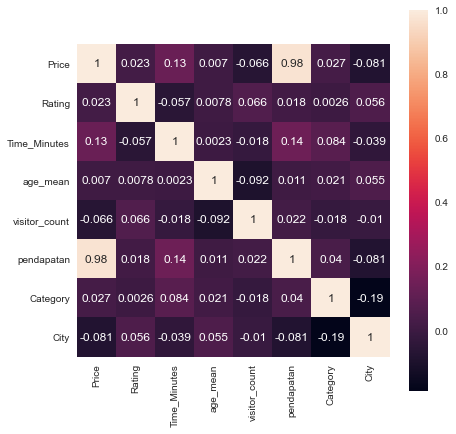

In [541]:
#Korelasi antar variabel
cor = tourism_model.corr()

#Plot dengan heatmap
fig, ax = plt.subplots(figsize=(7,7))
sns.heatmap(cor, annot=True, square = True) 

### KMeans

In [542]:
#list distorsi kosong
clusters = []

#membuat iterasi untuk n_clusters 1-10
for i in range(1, 11):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                random_state=0).fit(tourism_model)
    clusters.append(km.inertia_)

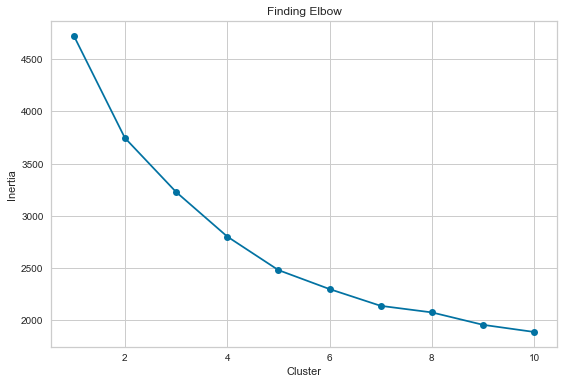

In [543]:
#menentukan n_clusters dengan elbow method
plt.plot(range(1, 11), clusters, marker='o')
plt.xlabel('Cluster')
plt.ylabel('Inertia')
plt.title("Finding Elbow")
plt.tight_layout()
plt.show()

In [544]:
from sklearn.metrics import silhouette_score
#list kosong untuk menyimpan score silhouette
all_score = []
#membuat iterasi dari 2-10
for i in range(2, 11):
    km = KMeans(n_clusters=i, 
                init='k-means++',
                random_state=0)
    #fit dataframe terhadap kmeans
    labels = km.fit(tourism_model).labels_
    #menambah data score ke list all_score
    all_score.append(silhouette_score(tourism_model, 
                                      labels, 
                                      metric="euclidean"))

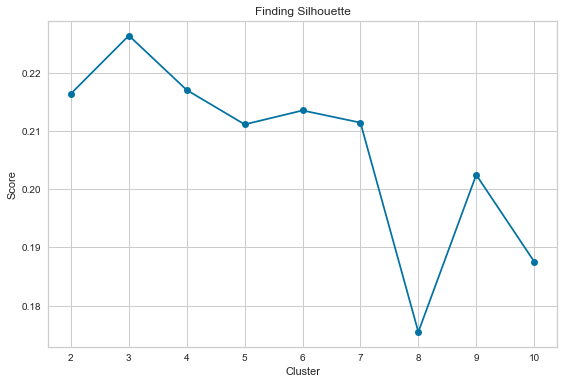

In [545]:
#menentukan n_clusters dengan silhouette method
plt.plot(range(2, 11), all_score, marker='o')
plt.xlabel('Cluster')
plt.ylabel('Score')
plt.title("Finding Silhouette")
plt.tight_layout()
plt.show()

In [546]:
#n_clusters terbesar adalah 3
#set n_clusters = 3
km = KMeans(n_clusters=3, 
            init='k-means++',
            random_state=0)
tourism_km = km.fit_predict(tourism_model)

In [547]:
print('segmen pelanggan:', tourism_km, end=' ')

segmen pelanggan: [2 2 0 2 2 2 2 0 0 2 2 2 2 0 2 2 2 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 0 2
 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2
 0 2 2 2 2 2 2 2 0 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 0 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2
 2 1 2 2 1 1 2 1 2 1 1 1 2 2 1 1 1 1 2 2 1 1 0 1 2 1 1 2 1 1 2 1 2 1 1 1 1
 1 1 1 1 1 1 2 2 1 2 1 0 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1] 

In [548]:
# Menggabungkan data awal dengann clusternya   
tourism_final = tourism_id.copy()    
tourism_final['cluster'] = tourism_km
tourism_final.head()

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,age_mean,visitor_count,pendapatan,cluster
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,27.0,18,360000,2
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6,90.0,29.0,25,0,2
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,270000,4.6,360.0,28.0,19,5130000,0
3,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,10000,4.5,0.0,30.0,21,210000,2
4,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5,60.0,29.0,25,2350000,2


In [549]:
#cluster 0
cluster_nol =tourism_final.loc[(tourism_final['cluster'].isin([0]))]
cluster_nol.head()

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,age_mean,visitor_count,pendapatan,cluster
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,270000,4.6,360.0,28.0,19,5130000,0
7,8,Ocean Ecopark,Ocean Ecopark Salah satu zona rekreasi Ancol y...,Taman Hiburan,Jakarta,180000,4.0,0.0,29.0,30,5400000,0
8,9,Pelabuhan Marina,Pelabuhan Marina Ancol berada di kawasan Taman...,Bahari,Jakarta,175000,4.4,0.0,29.0,19,3325000,0
13,14,Pulau Pelangi,Pulau Pelangi adalah sebuah pulau yang terleta...,Bahari,Jakarta,900000,4.8,0.0,29.0,18,16200000,0
18,19,Kidzania,KidZania adalah sebuah waralaba swasta Meksiko...,Taman Hiburan,Jakarta,185000,4.6,300.0,28.0,21,3885000,0


In [550]:
#cluster 1
cluster_satu =tourism_final.loc[(tourism_final['cluster'].isin([1]))]
cluster_satu.head()

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,age_mean,visitor_count,pendapatan,cluster
84,85,Taman Pintar Yogyakarta,Taman Pintar Yogyakarta (bahasa Jawa: Hanacara...,Taman Hiburan,Yogyakarta,6000,4.5,120.0,29.0,25,150000,1
85,86,Keraton Yogyakarta,Keraton Ngayogyakarta Hadiningrat atau Keraton...,Budaya,Yogyakarta,15000,4.6,0.0,28.0,25,375000,1
86,87,Sindu Kusuma Edupark (SKE),Sindu Kusuma Edupark (SKE) merupakan sebuah de...,Taman Hiburan,Yogyakarta,20000,4.2,120.0,29.0,19,380000,1
87,88,Museum Benteng Vredeburg Yogyakarta,Museum Benteng Vredeburg (bahasa Jawa: ꦩꦸꦱꦶꦪꦸꦩ...,Budaya,Yogyakarta,3000,4.6,120.0,28.0,32,96000,1
88,89,De Mata Museum Jogja,Museum De Mata merupakan salah satu museum yan...,Budaya,Yogyakarta,50000,4.4,0.0,29.0,31,1550000,1


In [551]:
#cluster 2
cluster_dua =tourism_final.loc[(tourism_final['cluster'].isin([2]))]
cluster_dua.head()

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,age_mean,visitor_count,pendapatan,cluster
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,27.0,18,360000,2
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6,90.0,29.0,25,0,2
3,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,10000,4.5,0.0,30.0,21,210000,2
4,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5,60.0,29.0,25,2350000,2
5,6,Taman Impian Jaya Ancol,Taman Impian Jaya Ancol merupakan sebuah objek...,Taman Hiburan,Jakarta,25000,4.5,10.0,30.0,24,600000,2


In [552]:
# Menampilkan data pelanggan per cluster nya  
for i in range(3):  
    print('\nPelanggan cluster: {}\n'.format(i))  
    print(tourism_final[tourism_final['cluster']== i][:5])


Pelanggan cluster: 0

    Place_Id        Place_Name  \
2          3     Dunia Fantasi   
7          8     Ocean Ecopark   
8          9  Pelabuhan Marina   
13        14     Pulau Pelangi   
18        19          Kidzania   

                                          Description       Category     City  \
2   Dunia Fantasi atau disebut juga Dufan adalah t...  Taman Hiburan  Jakarta   
7   Ocean Ecopark Salah satu zona rekreasi Ancol y...  Taman Hiburan  Jakarta   
8   Pelabuhan Marina Ancol berada di kawasan Taman...         Bahari  Jakarta   
13  Pulau Pelangi adalah sebuah pulau yang terleta...         Bahari  Jakarta   
18  KidZania adalah sebuah waralaba swasta Meksiko...  Taman Hiburan  Jakarta   

     Price  Rating  Time_Minutes  age_mean  visitor_count  pendapatan  cluster  
2   270000     4.6         360.0      28.0             19     5130000        0  
7   180000     4.0           0.0      29.0             30     5400000        0  
8   175000     4.4           0.0      29.0

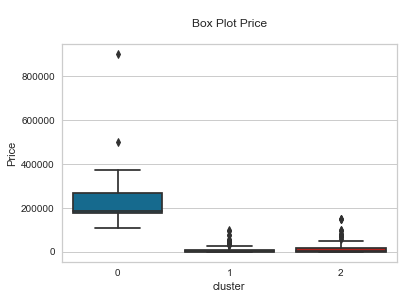

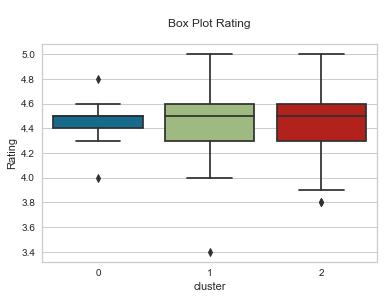

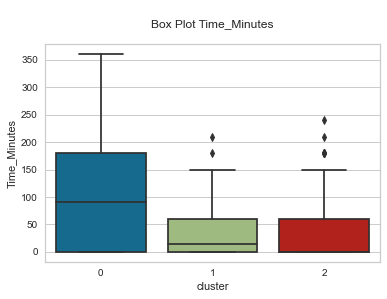

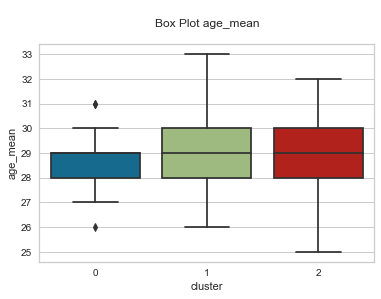

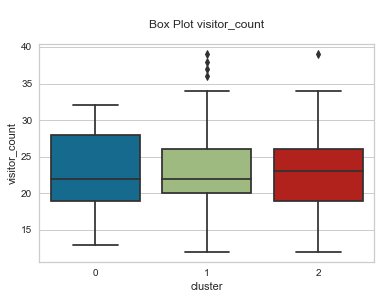

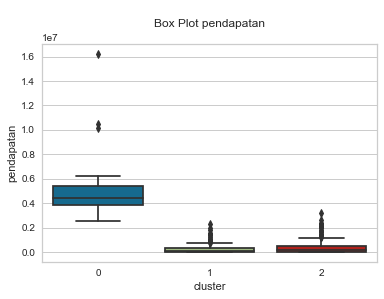

In [553]:
# Data Numerical
kolom_numerik = tourism_id.iloc[:, 5:11].columns.tolist() 

#iterasi kolom numerik untuk visualisasi
for i in kolom_numerik:  
    plt.figure(figsize=(6,4))  
    ax = sns.boxplot(x = 'cluster',y = i, data = tourism_final)  
    plt.title('\nBox Plot {}\n'.format(i), fontsize=12)  
    plt.show() 

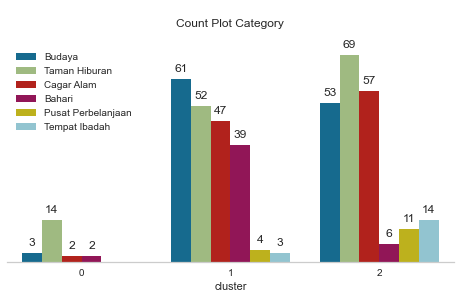

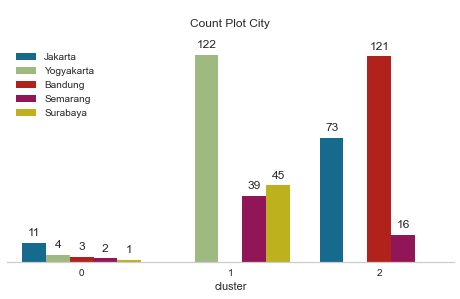

In [554]:
import matplotlib.pyplot as plt
# Data Kategorikal  
kolom_categorical = ['Category','City']  

#iterasi kolom kategorik untuk visualisasi
for i in kolom_categorical:  
    plt.figure(figsize=(8,4))  
    ax = sns.countplot(data = tourism_final, x = 'cluster', hue = i )  
    plt.title('\nCount Plot {}\n'.format(i), fontsize=12)  
    ax.legend(loc="best")  
    for p in ax.patches:  
        ax.annotate(format(p.get_height(), '.0f'),  
                    (p.get_x() + p.get_width() / 2., p.get_height()),  
                     ha = 'center',  
                     va = 'center',  
                     xytext = (0, 10),  
                     textcoords = 'offset points')  
      
    sns.despine(right=True,top = True, left = True)  
    ax.axes.yaxis.set_visible(False)  
    plt.show()  


In [555]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit_transform(tourism_id['City'])
list(le.classes_)
le.transform(["Jakarta", "Bandung", "Semarang", "Yogyakarta","Surabaya"])

array([1, 0, 2, 4, 3])

In [556]:
x = tourism_model[['City','age_mean']].values
km3 = KMeans(n_clusters=3).fit(x)
tourism_model['Labels'] = km3.labels_

C:\Users\Tio\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Tio\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
<ipython-input-557-5eb917458924>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


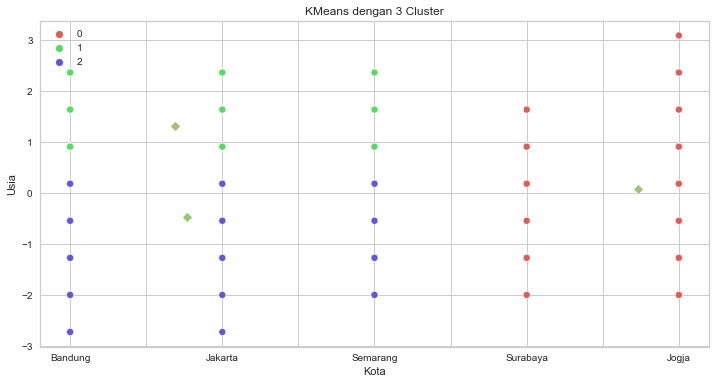

In [557]:
fig, ax = plt.subplots(figsize=(12,6))
#plt.figure(figsize=(12,6))

x1 = x[:,0]
x2 = x[:,1]
sns.scatterplot(x1, x2, hue=tourism_model['Labels'],
                palette=sns.color_palette('hls', 3))
# Assign the cluster centers: centroids
centroids = km3.cluster_centers_

# Assign the columns of centroids: centroids_x, centroids_y
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]
sns.scatterplot(centroids_x,centroids_y,marker='D', s=50)

plt.title('KMeans dengan 3 Cluster')
plt.xlabel('Kota')
plt.ylabel('Usia')
labels = [item.get_text() for item in ax.get_xticklabels()]
labels = '','Bandung','','Jakarta','','Semarang','','Surabaya','','Jogja',''

ax.set_xticklabels(labels)
plt.show()

In [558]:
#selecting features  
X = tourism_model[['City','Rating']]  

#Define KMeans as cluster_model  
cluster_model = KMeans(n_clusters = 3, random_state = 0)  
labels = cluster_model.fit_predict(X)

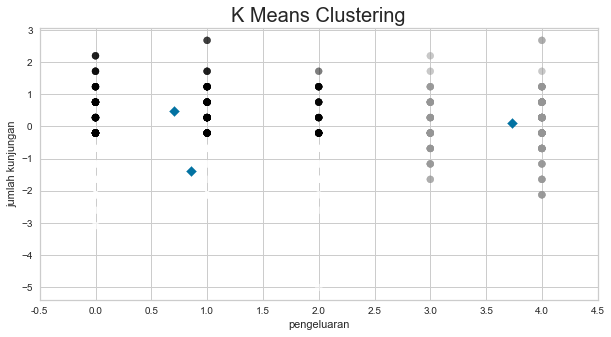

In [559]:
#convert dataframe to array
X = X.values
#Separate X to xs and ys --> use for chart axis
xs = X[:,0] #xs adalah kolom dengan index 0 yaitu annual_income
ys = X[:,1] #ys adalah kolom dengan index 1 yaitu spendind_score
# Make a scatter plot of xs and ys, using labels to define the colors
plt.scatter(xs,ys,c=labels, alpha=0.5) #c=labels berarti color ditentukan berdasarkan labels yang telah dibuat sebelumnya

# Assign the cluster centers: centroids
centroids = cluster_model.cluster_centers_
# Assign the columns of centroids: centroids_x, centroids_y
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]
# Make a scatter plot of centroids_x and centroids_y
plt.scatter(centroids_x,centroids_y,marker='D', s=50)
plt.title('K Means Clustering', fontsize = 20)
plt.xlabel('pengeluaran')
plt.ylabel('jumlah kunjungan')
labels, locations = plt.xticks()
plt.xticks(labels, labels)
plt.gcf().set_size_inches(10, 5)
plt.show()

In [560]:
score = silhouette_score(tourism_model, tourism_km)
print('Silhouetter Score: %.2f' % score)

Silhouetter Score: 0.24


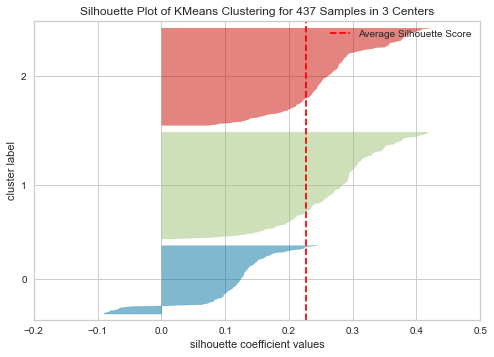

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 437 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [563]:
model = KMeans(3, random_state=0)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(tourism_model)        # Fit the data to the visualizer
visualizer.show()